# Imports

In [166]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

from imblearn.over_sampling import RandomOverSampler

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin



# Criando o data frame

In [167]:
df_train = pd.read_csv('archive/train.csv')
df_test = pd.read_csv('archive/train.csv')

In [168]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Removendo coluna de id e coluna com nome nulo

In [169]:
df_train = df_train.loc[:, ~df_train.columns.str.contains('^Unnamed')]
df_train['satisfied'] = df_train['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
df_train.drop(columns=['id', 'satisfaction'], inplace=True)

df_test = df_test.loc[:, ~df_test.columns.str.contains('^Unnamed')]
df_test['satisfied'] = df_test['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
df_test.drop(columns=['id', 'satisfaction'], inplace=True)

In [170]:
# Contando o número total de linhas no dataset
total_rows = df_train.shape[0]
total_rows

103904

In [171]:
# Contando o número de linhas com dados faltantes
missing_data_count = df_train.isnull().any(axis=1).sum()
missing_data_count

310

In [172]:
# Calculando o percentual de linhas com dados faltantes
percent_missing = (missing_data_count / total_rows) * 100
print(f"O percentual de dados faltantes {percent_missing}%")

O percentual de dados faltantes 0.29835232522328303%


In [173]:
df_train.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfied 

In [174]:
# Imprimindo o maior valor da coluna Departure Delay in Minutes
max_value = df_train['Departure Delay in Minutes'].max()
print("O maior valor da coluna 'Departure Delay in Minutes' é:", max_value)


O maior valor da coluna 'Departure Delay in Minutes' é: 1592


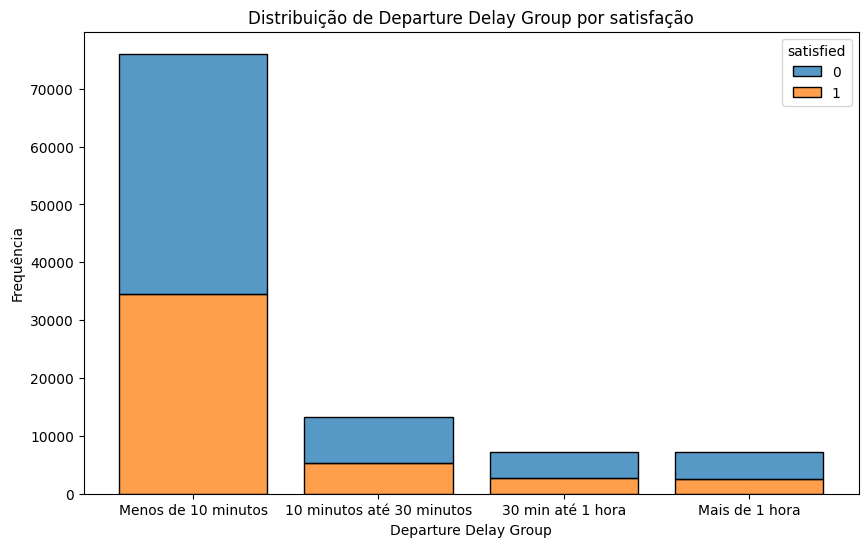

In [175]:
# Definindo os intervalos de agrupamento para Departure Delay in Minutes
bins = [-1, 10, 30, 60, float('inf')]
labels = ['Menos de 10 minutos', '10 minutos até 30 minutos', '30 min até 1 hora', 'Mais de 1 hora']
df_train['Departure Delay Group'] = pd.cut(df_train['Departure Delay in Minutes'], bins=bins, labels=labels)

# Criando um histograma para plotar a distribuição da variável agrupada com relação à variável satisfied
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Departure Delay Group', hue='satisfied', multiple='stack', shrink=0.8)
plt.title('Distribuição de Departure Delay Group por satisfação')
plt.xlabel('Departure Delay Group')
plt.ylabel('Frequência')
plt.show()

In [176]:
# Imprimindo o maior valor da coluna Departure Delay in Minutes
max_value = df_train['Arrival Delay in Minutes'].max()
print("O maior valor da coluna 'Departure Delay in Minutes' é:", max_value)


O maior valor da coluna 'Departure Delay in Minutes' é: 1584.0


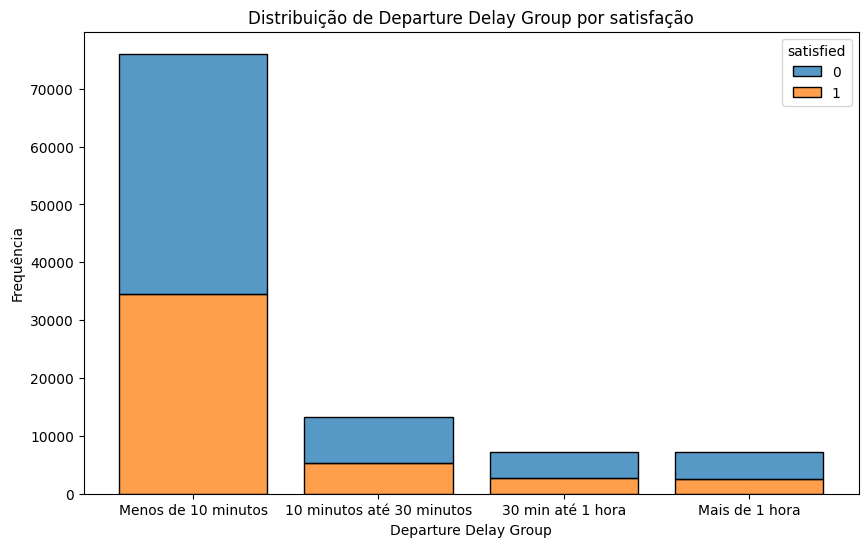

In [49]:
# Definindo os intervalos de agrupamento para Departure Delay in Minutes
bins = [-1, 10, 30, 60, float('inf')]
labels = ['Menos de 10 minutos', '10 minutos até 30 minutos', '30 min até 1 hora', 'Mais de 1 hora']
df_train['Arrival Delay Group'] = pd.cut(df_train['Arrival Delay in Minutes'], bins=bins, labels=labels)

# Criando um histograma para plotar a distribuição da variável agrupada com relação à variável satisfied
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Departure Delay Group', hue='satisfied', multiple='stack', shrink=0.8)
plt.title('Distribuição de Departure Delay Group por satisfação')
plt.xlabel('Departure Delay Group')
plt.ylabel('Frequência')
plt.show()

## Oversampling

In [12]:
size_difference = (len(class2_50_percent) + len(class2_25_percent_1)) - (len(class1_50_percent) + len(class1_25_percent_1))
size_difference

10357

In [13]:
to_be_oversampled = pd.concat([class2_50_percent, class2_25_percent_1, class1_50_percent, class1_25_percent_1])

In [14]:
oversampler = RandomOverSampler(random_state=42)

In [15]:
X_resampled, y_resampled = oversampler.fit_resample(to_be_oversampled.drop('satisfaction', axis=1), to_be_oversampled['satisfaction'])

In [16]:
df_resampled = pd.DataFrame(X_resampled, columns=df.drop('satisfaction', axis=1).columns)
merged_df = df_resampled.join(y_resampled, how='inner')
merged_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,37,Personal Travel,Eco Plus,1127,2,4,2,3,...,3,4,4,5,4,4,3,0,0.0,neutral or dissatisfied
1,Female,Loyal Customer,47,Personal Travel,Eco,173,1,4,1,2,...,4,4,1,2,5,4,5,0,0.0,neutral or dissatisfied
2,Male,Loyal Customer,31,Business travel,Business,1587,4,2,2,2,...,4,4,2,4,2,3,4,0,6.0,neutral or dissatisfied
3,Female,Loyal Customer,14,Personal Travel,Eco Plus,888,3,3,3,4,...,3,2,2,3,2,4,3,33,38.0,neutral or dissatisfied
4,Male,disloyal Customer,15,Business travel,Eco,845,2,2,2,3,...,4,2,1,4,1,1,4,0,0.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88125,Male,disloyal Customer,21,Business travel,Business,1121,4,5,4,2,...,1,5,2,5,3,4,1,0,0.0,satisfied
88126,Female,Loyal Customer,40,Business travel,Eco,404,4,4,1,4,...,4,3,1,2,1,2,4,32,26.0,satisfied
88127,Male,Loyal Customer,28,Business travel,Business,1739,1,1,1,1,...,2,4,3,5,4,5,2,0,0.0,satisfied
88128,Female,Loyal Customer,41,Business travel,Business,368,2,2,2,2,...,4,4,4,4,5,4,4,0,0.0,satisfied


In [17]:
class1_df = merged_df[merged_df['satisfaction'] == 'satisfied']
class2_df = merged_df[merged_df['satisfaction'] == 'neutral or dissatisfied']

In [18]:
class1_50_percent = class1_df.sample(frac=50/75)
class1_25_percent_1 = class1_df.drop(class1_50_percent.index)

In [19]:
class2_50_percent = class2_df.sample(frac=50/75)
class2_25_percent_1 = class2_df.drop(class2_50_percent.index)

## Tratamento

In [182]:
# Definir a função para categorizar os atrasos
def categorize_delay(minutes):
    if minutes < 10:
        return 'Menos de 10 minutos'
    elif minutes < 30:
        return '10 minutos até 30 minutos'
    elif minutes < 60:
        return '30 min até 1 hora'
    else:
        return 'Mais de 1 hora'

# Criar um transformador personalizado para aplicar a função de categorização
class DelayCategorizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['Departure Delay Category'] = X_transformed['Departure Delay in Minutes'].apply(categorize_delay)
        X_transformed['Arrival Delay Category'] = X_transformed['Arrival Delay in Minutes'].apply(categorize_delay)
        return X_transformed[['Departure Delay Category', 'Arrival Delay Category']]
    
    def get_feature_names_out(self, input_features=None):
        return ['Departure Delay Category', 'Arrival Delay Category']
    
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_features = [feat for feat in numeric_features if feat not in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']]

categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
], memory=None)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
], memory=None)

delay_categorizer = Pipeline(steps=[
    ('categorizer', DelayCategorizer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
], memory=None)

lista = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('delay_cat', delay_categorizer, lista)
    ],
    verbose_feature_names_out=False)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)], memory=None)
df_train_processado =  pd.DataFrame(pipeline.fit_transform(df_train), columns = pipeline.get_feature_names_out())
df_test_processado = pd.DataFrame(pipeline.transform(df_test), columns = pipeline.get_feature_names_out())


In [183]:
df_train_processado.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Class_Eco,Class_Eco Plus,Departure Delay Category_10 minutos até 30 minutos,Departure Delay Category_30 min até 1 hora,Departure Delay Category_Mais de 1 hora,Departure Delay Category_Menos de 10 minutos,Arrival Delay Category_10 minutos até 30 minutos,Arrival Delay Category_30 min até 1 hora,Arrival Delay Category_Mais de 1 hora,Arrival Delay Category_Menos de 10 minutos
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [184]:
df_test_processado.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Class_Eco,Class_Eco Plus,Departure Delay Category_10 minutos até 30 minutos,Departure Delay Category_30 min até 1 hora,Departure Delay Category_Mais de 1 hora,Departure Delay Category_Menos de 10 minutos,Arrival Delay Category_10 minutos até 30 minutos,Arrival Delay Category_30 min até 1 hora,Arrival Delay Category_Mais de 1 hora,Arrival Delay Category_Menos de 10 minutos
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [185]:
df_test_processado.dtypes

Age                                                   float64
Flight Distance                                       float64
Inflight wifi service                                 float64
Departure/Arrival time convenient                     float64
Ease of Online booking                                float64
Gate location                                         float64
Food and drink                                        float64
Online boarding                                       float64
Seat comfort                                          float64
Inflight entertainment                                float64
On-board service                                      float64
Leg room service                                      float64
Baggage handling                                      float64
Checkin service                                       float64
Inflight service                                      float64
Cleanliness                                           float64
satisfie

In [186]:
df_train_processado, df_val_processado = train_test_split(df_train_processado, test_size=0.25, random_state=81)

In [187]:
df_train_processado.to_csv("dataset_tratado/train_df.csv", index=False)
df_val_processado.to_csv("dataset_tratado/validation_df.csv", index=False)
df_test_processado.to_csv("dataset_tratado/test_df.csv", index=False)

## Fazendo oversampling no conjunto de treinamento

Calculando a classe majoritaria e a diferênça

In [24]:
size_difference = (len(class2_50_percent) + len(class2_25_percent_1)) - (len(class1_50_percent) + len(class1_25_percent_1))
size_difference

0

In [25]:
train_df = pd.concat([class1_50_percent, class2_50_percent], ignore_index=True)
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [26]:
validation_df = pd.concat([class1_25_percent_1, class2_25_percent_1], ignore_index=True)
validation_df = validation_df.sample(frac=1).reset_index(drop=True)

In [27]:
test_df = pd.concat([class1_25_percent_2, class2_25_percent_2], ignore_index=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [28]:
train_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,satisfaction_neutral or dissatisfied
0,-0.277804,-0.089306,-1.446976,-0.754370,-0.451942,-0.812200,0.026713,-0.568924,-0.797232,-1.436397,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,1.0
1,-0.216967,-1.004828,-1.446976,-2.083373,-1.279667,-0.812200,-1.460984,-1.438593,-1.564104,-1.436397,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,1.0
2,1.668967,-0.408911,1.656614,-0.754370,1.203508,0.852722,0.770562,1.170413,0.736513,0.832220,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0
3,0.999764,1.976030,0.622084,1.239135,0.375783,0.020261,0.026713,0.300744,1.503385,0.832220,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,1.0
4,1.486457,-0.307045,-0.412446,-0.754370,-0.451942,0.852722,0.770562,-0.568924,0.736513,0.832220,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,1.0


In [29]:
test_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,47,Business travel,Eco Plus,788,1,1,1,1,...,1,2,1,4,1,4,1,18,4.0,neutral or dissatisfied
1,Male,Loyal Customer,56,Personal Travel,Business,189,1,5,1,2,...,2,2,1,4,5,2,5,26,15.0,neutral or dissatisfied
2,Male,Loyal Customer,18,Personal Travel,Eco,181,2,4,2,3,...,3,4,3,5,5,5,3,12,4.0,neutral or dissatisfied
3,Female,Loyal Customer,56,Business travel,Business,3714,1,1,1,1,...,4,4,4,4,5,4,3,0,0.0,satisfied
4,Male,Loyal Customer,34,Personal Travel,Eco,954,4,3,4,5,...,1,4,2,1,4,1,1,0,0.0,neutral or dissatisfied


In [30]:
validation_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,satisfaction_neutral or dissatisfied
0,-1.557568,-0.750854,1.652504,1.246276,1.202880,1.697924,0.761992,1.174580,0.727990,0.823985,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,1.0
1,1.910388,0.085612,1.162599,1.305796,1.247893,1.472153,-1.229521,-0.878055,0.897640,0.040950,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN
2,1.006257,-0.805723,0.618069,0.579683,0.375227,-1.657941,1.501186,0.300253,1.492793,1.574866,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN,1.0
3,-1.313395,0.607149,-1.450801,-0.753502,-1.280078,0.019992,1.501186,-1.448403,1.492793,1.574866,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,1.0
4,-0.947134,-0.520156,0.618069,-0.086909,0.375227,-0.818974,1.501186,0.300253,1.492793,1.574866,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,1.0


In [31]:
train_df['satisfaction'] = train_df['satisfaction_satisfied'].apply(lambda x: 1 if x == 1.0 else 0)
validation_df['satisfaction'] = validation_df['satisfaction_satisfied'].apply(lambda x: 1 if x == 1.0 else 0)

In [32]:
train_df.drop(columns=['satisfaction_satisfied', 'satisfaction_neutral or dissatisfied'], inplace=True)
validation_df.drop(columns=['satisfaction_satisfied', 'satisfaction_neutral or dissatisfied'], inplace=True)

In [33]:
# Salvar o dataset atualizado
train_df.to_csv('dataset_tratado/train_df.csv', index=False)
validation_df.to_csv('dataset_tratado/validation_df.csv', index=False)